In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.orm import Session, scoped_session, sessionmaker
from sqlalchemy import func
from flask import Flask, jsonify


In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
# reflect the tables
session = scoped_session(sessionmaker(bind=engine))
Base = declarative_base()
Base.metadata.create_all(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)


In [22]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is {recent_date[0]}")


The most recent date in the data set is 2017-08-23


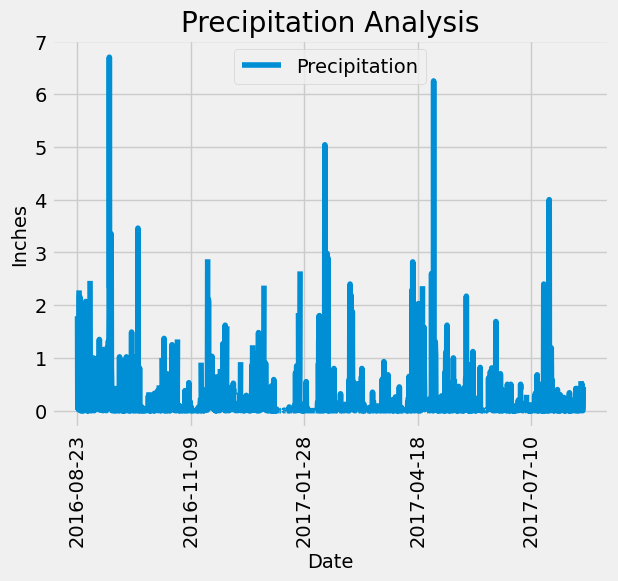

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results starting from the most recent data point in the database.
recent_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2017-08-23').order_by(Measurement.date).all()

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])


# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
print(f"There are {station_count} stations in the dataset")


There are 9 stations in the dataset


In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

#Display the information
for station in active_stations:
    print(station)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
temp_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

#Display the information
print(f"The lowest, highest, and average temperature for station {most_active_station} is {temp_data[0]}")


The lowest, highest, and average temperature for station USC00519281 is (54.0, 85.0, 71.66378066378067)


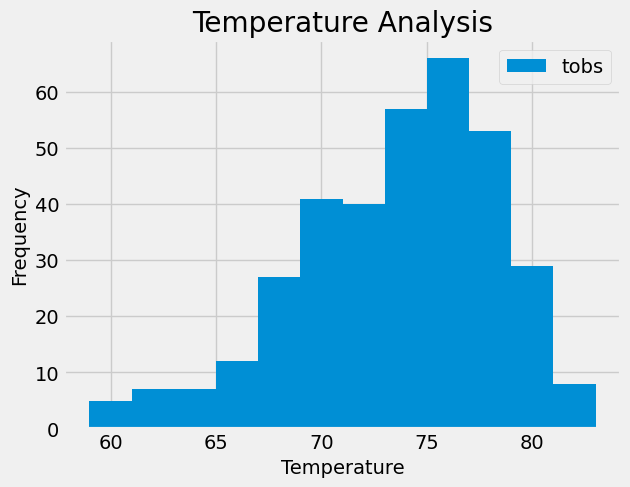

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

#Display the information
temp_df = pd.DataFrame(temp_data, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Analysis")
plt.legend(["tobs"])
plt.show()


# Close Session

In [35]:
# Close Session
session.close()